In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pltpip 


In [ ]:
#load dataset 
df = pd.read_csv('sales_data.csv')
df


In [145]:
#check first few rows of data
df.head()


,Date,Region,Product Category,Units Sold,Revenue,Profit Margin (%),Customer Type
0,2023-04-13,East,Electronics,18,761,9.82,New
1,2023-12-15,South,Toys,25,4744,24.52,Returning
2,2023-09-28,North,Clothing,12,411,21.03,Returning
3,2023-04-17,West,Clothing,15,3020,24.19,Returning
4,2023-03-13,West,Electronics,26,1182,14.76,New


In [146]:
#Get summary statistics(mean, median, standard deviation)
#An aggregating function is a type of function used in data analysis and database management to perform a calculation on a set of values and return a single value
df.agg(
    { 
        "Units Sold" : ["mean", "median", "std", "min", "max", "count"],
        "Revenue" : ["mean", "median", "std", "min", "max", "count"],
        "Profit Margin (%)": ["mean", "median", "std", "min", "max", "count"],


    }
)

,Units Sold,Revenue,Profit Margin (%)
mean,25.158000,2565.624000,15.19228
median,25.000000,2598.500000,15.47000
std,13.812698,1413.019626,5.78963
min,1.000000,101.000000,5.06000
max,49.000000,4995.000000,24.97000
count,500.000000,500.000000,500.00000


In [147]:
#check datatypes, null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               500 non-null    object 
 1   Region             500 non-null    object 
 2   Product Category   500 non-null    object 
 3   Units Sold         500 non-null    int64  
 4   Revenue            500 non-null    int64  
 5   Profit Margin (%)  500 non-null    float64
 6   Customer Type      500 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 27.5+ KB


In [148]:

#checking for missing values using isnull()
df = pd.read_csv("sales_data.csv")
missing_values = df.isnull()
print(missing_values)



      Date  Region  Product Category  Units Sold  Revenue  Profit Margin (%)  \
0    False   False             False       False    False              False   
1    False   False             False       False    False              False   
2    False   False             False       False    False              False   
3    False   False             False       False    False              False   
4    False   False             False       False    False              False   
..     ...     ...               ...         ...      ...                ...   
495  False   False             False       False    False              False   
496  False   False             False       False    False              False   
497  False   False             False       False    False              False   
498  False   False             False       False    False              False   
499  False   False             False       False    False              False   

     Customer Type  
0            False

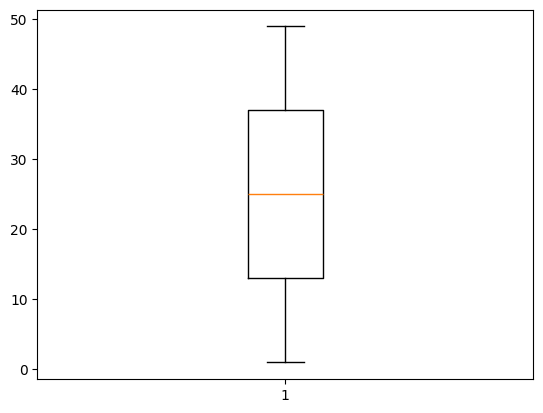

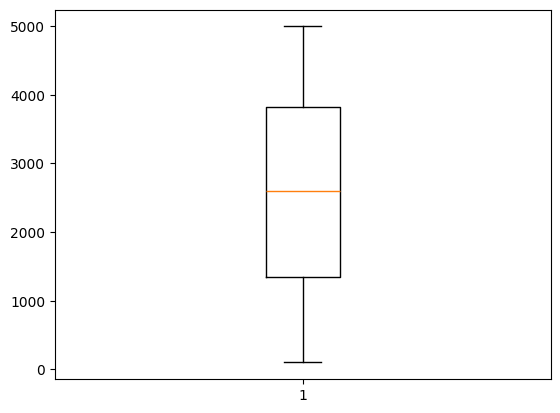

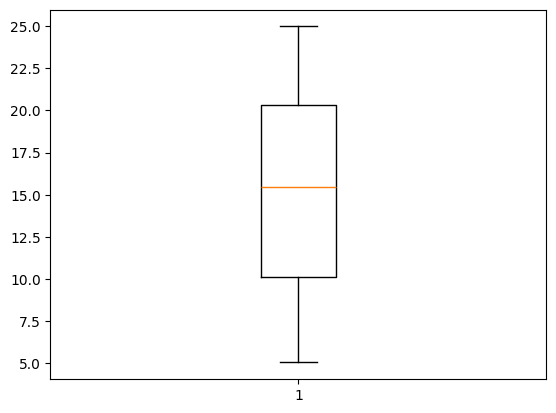

In [149]:
#Identify and handle outliers
plt.boxplot(df['Units Sold'])
plt.show()
plt.boxplot(df['Revenue'])
plt.show()
plt.boxplot(df['Profit Margin (%)'])
plt.show()

<Axes: >

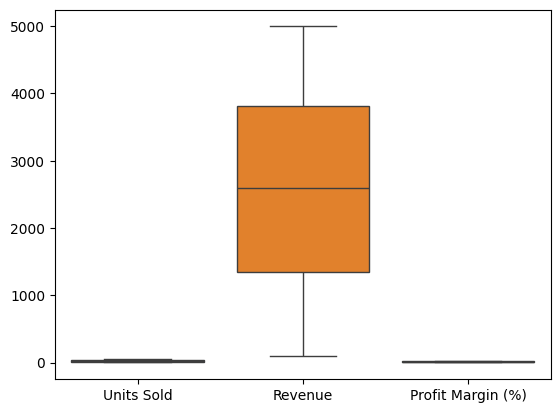

In [150]:
#Univariate and multivariate analysis
#Generate boxplots for numerical variables
sns.boxplot(df)

<Axes: ylabel='Count'>

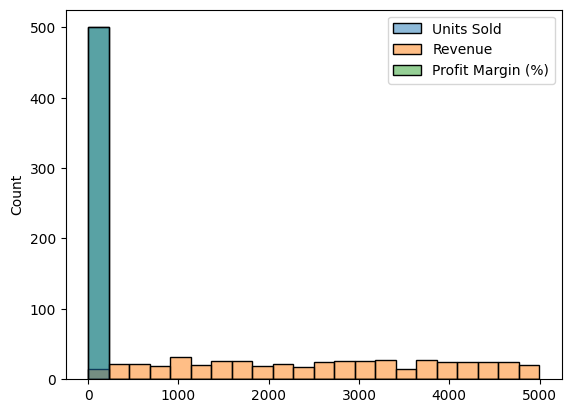

In [151]:
#Generate histrogram for numeerical variables

sns.histplot(df)

<Axes: >

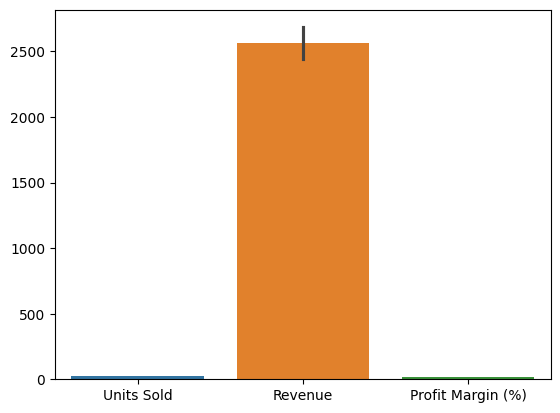

In [152]:
#Create bar charts to visualise the distribution of categorical variables
sns.barplot(df)

In [153]:
#from dataframe 
#Use correlation matrices to analyses relationships between numerical variables
df= pd.DataFrame(df, columns=['Units Sold', 'Revenue', 'Profit Margin (%)'])
print('df is : ')
print(df)

df is : 
     Units Sold  Revenue  Profit Margin (%)
0            18      761               9.82
1            25     4744              24.52
2            12      411              21.03
3            15     3020              24.19
4            26     1182              14.76
..          ...      ...                ...
495          44     4937              16.98
496          18     2808               7.30
497           6     1000               6.88
498          18     3184              23.19
499          19     2109              18.38

[500 rows x 3 columns]


In [ ]:
#from correlation matrix
matrix = df.corr()
print("Correlation matrix is : ")

In [ ]:
print(matrix)

In [ ]:
#Generate heatmaps to identify high-performing regions
plt.figure(figsize=(12, 6))
sns.heatmap(matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
#Create line charts to show sales trends over time
import matplotlib.pyplot as plt

#plot the sales trends over time
df.plot(x='Date', y=['Units Sold'])

#set the x-axis label
plt.xlabel('Date')

#set the y-axis label
plt.ylabel('Units Sold')

#set the title of the plot
plt.title('The sales trends over time') 

#Display the plot 
plt.show()





In [ ]:
#scatter plot to analyse revenue vs. profit margin.
import numpy as np 

x = np.array(df['Units Sold'])
y = np.array(df['Profit Margin (%)'])
 
plt.xlabel('Revenue')
plt.ylabel('Profit Margin (%)')

plt.title('Analyzing revenue vs profit margin')

plt.scatter(x,y)
plt.show()

In [ ]:
#Build bar plots showing product category performance across different regions
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Create a bar plot
sns.barplot(x='Product Category', y='Region', data=df)


#set the x-axis label 
plt.xlabel('Product Category')

#set the y-axis label
plt.ylabel('Region')

#set the title of the plot 
plt.title('product category performance across different regions')

#display the plot
plt.show()

In [ ]:
#identify the best-performing region based on revenue and profit
#grouping the regions
regionS = df[df['Region'] == 'South']
regionN = df[df['Region'] == 'North']
regionW = df[df['Region'] == 'West']
regionE = df[df['Region'] == 'East']
 
#getting the sums
regionS_revenue = regionS['Revenue'].sum()
regionS_profit = regionS['Profit Margin (%)'].sum()
 
regionN_revenue = regionN['Revenue'].sum()
regionN_profit = regionN['Profit Margin (%)'].sum()
 
regionW_revenue = regionW['Revenue'].sum()
regionW_profit = regionW['Profit Margin (%)'].sum()
 
regionE_revenue = regionE['Revenue'].sum()
regionE_profit = regionE['Profit Margin (%)'].sum()
 
 
#grouping
region_results = df.groupby('Region')[['Revenue', 'Profit Margin (%)']].sum()
 
#determining the best region per metric
best_revenue = region_results['Revenue'].idxmax()
best_profit = region_results['Profit Margin (%)'].idxmax()
 
print(best_revenue)
print(best_profit)
 

In [ ]:
#Find which product category generates the highest revenue
#Group by Product Category and sum the revenue
category_revenue = df.groupby('Product Category')['Revenue'].sum().reset_index()

# Display results
print(category_revenue)

# Find the product category with the highest revenue
best_category = category_revenue.loc[category_revenue['Revenue'].idxmax(), 'Product Category']
best_revenue = category_revenue['Revenue'].max()

print(f"The highest revenue-generating product category is: {best_category} with revenue of {best_revenue}")

plt.figure(figsize=(10, 5))

# Create a bar plot
sns.barplot(x='Product Category', y='Revenue', data=category_revenue, palette='viridis')

# Add labels and title
plt.xlabel('Product Category')
plt.ylabel('Revenue')
plt.title('Revenue by Product Category')

# Show the plot
plt.show()

